In [1]:
import os
import pandas as pd
import requests
import zipfile
from urllib.parse import urljoin
from bs4 import BeautifulSoup

# ETL 

In [2]:
def download_file(url, path):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(path, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
    return path

def unzip_and_remove(zip_path, destination_directory):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destination_directory)
    os.remove(zip_path)

def scrape_and_download(base_url, start_year=2000):
    if not os.path.exists('Bases_calidad_aire'):
        os.makedirs('Bases_calidad_aire')

    response = requests.get(base_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    links = soup.find_all('a')

    for link in links:
        href = link.get('href')
        if href and 'annual_conc_by_monitor' in href and href.endswith('.zip'):
            year = href.split('_')[-1].split('.')[0]
            try:
                year = int(year)
                if year >= start_year:
                    download_url = urljoin(base_url, href)
                    zip_path = os.path.join('Bases_calidad_aire', href)

                    # Verificar si el archivo ya existe en el directorio antes de descargarlo
                    if not os.path.exists(zip_path):
                        print(f'Descargando {download_url}...')
                        download_file(download_url, zip_path)
                        print(f'Descargado en {zip_path}')

                    print(f'Descomprimiendo {zip_path}...')
                    unzip_and_remove(zip_path, 'Bases_calidad_aire')
                    print(f'Descomprimido y eliminado {zip_path}')
                else:
                    print(f'El año {year} es anterior al año de inicio {start_year}. Saltando descarga.')
            except ValueError:
                pass

base_url = 'https://aqs.epa.gov/aqsweb/airdata/download_files.html'
scrape_and_download(base_url)

agregar las emisiones por stado y por año 

In [ ]:
# Lista de archivos CSV en el directorio
csv_files = [file for file in os.listdir("Bases_calidad_aire") if file.endswith('.csv')]


In [ ]:
# Directorio donde se encuentran los archivos descomprimidos
base_directory = 'Bases_calidad_aire'

# Lista de archivos CSV en el directorio
csv_files = [file for file in os.listdir(base_directory) if file.endswith('.csv')]

# Crear una lista para almacenar los DataFrames originales
original_dfs = []

# Función para cargar los datos originales sin filtrar
def load_original_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Iterar sobre los archivos CSV y cargar los DataFrames originales
for csv_file in csv_files:
    file_path = os.path.join(base_directory, csv_file)
    original_df = load_original_data(file_path)
    original_dfs.append(original_df)

# Crear un DataFrame que contenga las columnas de cada DataFrame en original_dfs
columns_df = pd.DataFrame({'File': csv_files})
columns_df['Columns'] = [list(df.columns) for df in original_dfs]


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_18168\4280088424.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_18168\4280088424.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_18168\4280088424.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_18168\4280088424.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_18168\4280088424.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


                               File  \
0   annual_conc_by_monitor_2023.csv   
1   annual_conc_by_monitor_2022.csv   
2   annual_conc_by_monitor_2021.csv   
3   annual_conc_by_monitor_2020.csv   
4   annual_conc_by_monitor_2019.csv   
5   annual_conc_by_monitor_2018.csv   
6   annual_conc_by_monitor_2017.csv   
7   annual_conc_by_monitor_2016.csv   
8   annual_conc_by_monitor_2015.csv   
9   annual_conc_by_monitor_2014.csv   
10  annual_conc_by_monitor_2013.csv   
11  annual_conc_by_monitor_2012.csv   
12  annual_conc_by_monitor_2011.csv   
13  annual_conc_by_monitor_2000.csv   
14  annual_conc_by_monitor_2010.csv   
15  annual_conc_by_monitor_2009.csv   
16  annual_conc_by_monitor_2008.csv   
17  annual_conc_by_monitor_2007.csv   
18  annual_conc_by_monitor_2006.csv   
19  annual_conc_by_monitor_2005.csv   
20  annual_conc_by_monitor_2004.csv   
21  annual_conc_by_monitor_2003.csv   
22  annual_conc_by_monitor_2002.csv   
23  annual_conc_by_monitor_2001.csv   
24              aggregate

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_18168\4280088424.py:12: DtypeWarning: Columns (0,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
columns_df.to_csv(os.path.join(base_directory, 'columnas_por_archivo.csv'), index=False)


In [ ]:
# Directorio donde se encuentran los archivos descomprimidos
base_directory = 'Bases_calidad_aire'

# Lista de archivos CSV en el directorio
csv_files = [file for file in os.listdir(base_directory) if file.endswith('.csv')]

# Columnas que se deben mantener en todos los archivos
columns_to_keep = [
    'State Name', 'County Name', 'City Name', 'Date of Last Change',
    'Latitude', 'Longitude', 'Parameter Name', 'Metric Used',
    'Year', 'Units of Measure', 'Arithmetic Mean'
]

# Criterios para filtrar las filas
parameter_name_criteria = ["PM2.5 - Local Conditions", "Ozone"]
metric_used_criteria = "Observed Values"





In [ ]:
# Directorio donde se encuentran los archivos descomprimidos
base_directory = 'Bases_calidad_aire'

# Lista de archivos CSV en el directorio
csv_files = [file for file in os.listdir(base_directory) if file.endswith('.csv')]

# Columnas que se deben mantener en todos los archivos y sus respectivos tipos de datos
columns_to_keep = {
    'State Name': str, 'County Name': str, 'City Name': str, 
    'Date of Last Change': 'datetime64', 'Latitude': float, 'Longitude': float, 
    'Parameter Name': str, 'Metric Used': str, 'Year': int, 
    'Units of Measure': str, 'Arithmetic Mean': float
}

# Función para procesar cada archivo CSV y cargar los datos formateados y filtrados
def load_and_format_data(file_path):
    # Cargando los datos
    df = pd.read_csv(file_path, low_memory=False)

    # Manteniendo solo las columnas necesarias
    df = df[list(columns_to_keep.keys())]

    # Formateando los datos según los tipos especificados
    for column, dtype in columns_to_keep.items():
        df[column] = df[column].astype(dtype, errors='ignore')

    return df

# Crear una lista para almacenar los DataFrames procesados
processed_dfs = []

# Iterar sobre los archivos CSV, procesar los datos y almacenar los DataFrames procesados
for csv_file in csv_files:
    file_path = os.path.join(base_directory, csv_file)
    try:
        processed_df = load_and_format_data(file_path)
        processed_dfs.append(processed_df)
    except Exception as e:
        print(f"Error procesando {csv_file}: {e}")

# Unificando todos los DataFrames procesados en un solo DataFrame
combined_df = pd.concat(processed_dfs, ignore_index=True)

# Mostrando las primeras filas del DataFrame combinado
combined_df.head()

,State Name,County Name,City Name,Date of Last Change,Latitude,Longitude,Parameter Name,Metric Used,Year,Units of Measure,Arithmetic Mean
0,Alabama,Baldwin,Fairhope,2023-09-22,30.497478,-87.880258,Ozone,Daily maxima of observed hourly values (betwee...,2023,Parts per million,0.047051
1,Alabama,Baldwin,Fairhope,2023-09-22,30.497478,-87.880258,Ozone,Daily maximum of 8 hour running average of obs...,2023,Parts per million,0.042835
2,Alabama,Baldwin,Fairhope,2023-09-22,30.497478,-87.880258,Ozone,Daily maximum of 8 hour running average of obs...,2023,Parts per million,0.042835
3,Alabama,Baldwin,Fairhope,2023-09-22,30.497478,-87.880258,Ozone,Daily maximum of 8-hour running average,2023,Parts per million,0.042841
4,Alabama,Baldwin,Fairhope,2023-09-22,30.497478,-87.880258,PM2.5 - Local Conditions,Observed Values,2023,Micrograms/cubic meter (LC),7.737054


In [ ]:
combined_df.to_csv("combined_df.csv")

In [ ]:
parameter_name_criteria = ["PM2.5 - Local Conditions", "Ozone"]
metric_used_criteria = "Observed Values"

# Filtrar el DataFrame combinado para mantener solo las filas que cumplan los criterios
filtered_df = combined_df[(combined_df['Parameter Name'].isin(parameter_name_criteria)) & (combined_df['Metric Used'] == metric_used_criteria)]


In [ ]:
filtered_df

,State Name,County Name,City Name,Date of Last Change,Latitude,Longitude,Parameter Name,Metric Used,Year,Units of Measure,Arithmetic Mean
4,Alabama,Baldwin,Fairhope,2023-09-22,30.497478,-87.880258,PM2.5 - Local Conditions,Observed Values,2023,Micrograms/cubic meter (LC),7.737054
11,Alabama,Clay,Ashland,2023-09-22,33.284928,-85.803608,PM2.5 - Local Conditions,Observed Values,2023,Micrograms/cubic meter (LC),10.495280
18,Alabama,DeKalb,Crossville,2023-10-17,34.288567,-85.969858,PM2.5 - Local Conditions,Observed Values,2023,Micrograms/cubic meter (LC),9.555592
40,Alabama,Etowah,Gadsden,2023-09-22,33.991494,-85.992647,PM2.5 - Local Conditions,Observed Values,2023,Micrograms/cubic meter (LC),9.705033
210,Alabama,Jefferson,Leeds,2023-10-12,33.545278,-86.549167,PM2.5 - Local Conditions,Observed Values,2023,Micrograms/cubic meter (LC),10.469380
...,...,...,...,...,...,...,...,...,...,...,...
1300602,Montana,Ravalli,Hamilton,2023-06-24,46.243621,-114.158889,PM2.5 - Local Conditions,Observed Values,2008,Micrograms/cubic meter (LC),8.083018
1300671,Montana,Richland,nan,2021-11-08,47.803392,-104.485552,PM2.5 - Local Conditions,Observed Values,2008,Micrograms/cubic meter (LC),5.081438
1302169,New Hampshire,Cheshire,Keene,2021-11-08,42.930521,-72.272332,PM2.5 - Local Conditions,Observed Values,2008,Micrograms/cubic meter (LC),11.700185
1302257,New Hampshire,Grafton,Lebanon,2021-11-08,43.629605,-72.309499,PM2.5 - Local Conditions,Observed Values,2008,Micrograms/cubic meter (LC),5.494565


In [ ]:
# Colapsando el DataFrame 'filtered_df' para obtener la media de 'Arithmetic Mean' por 'Year', 'State Name' y 'Parameter Name'
collapsed_df = filtered_df.pivot_table(
    index=['Year', 'State Name'],
    columns='Parameter Name',
    values='Arithmetic Mean',
    aggfunc='mean'
).reset_index()

# Renombrando las columnas para mayor claridad
collapsed_df.columns.name = None
collapsed_df = collapsed_df.rename(columns={
    "PM2.5 - Local Conditions": "PM2.5 Mean",
    "Ozone": "Ozone Mean"
})

# Mostrando el DataFrame colapsado
collapsed_df.head()


,Year,State Name,PM2.5 Mean
0,2008,California,16.584468
1,2008,Hawaii,9.162235
2,2008,Indiana,13.428725
3,2008,Maryland,12.211832
4,2008,Montana,8.094097


In [ ]:
# Colapsando el DataFrame 'filtered_df' para obtener la media de 'Arithmetic Mean' por 'Year', 'State Name' y 'Parameter Name'
collapsed_df = filtered_df.groupby(['Year', 'State Name', 'Parameter Name']).agg({
    'Arithmetic Mean': 'mean'
}).reset_index()

# Pivotando el DataFrame para tener una columna para PM2.5 y otra para Ozone
pivot_df = collapsed_df.pivot_table(index=['Year', 'State Name'], columns='Parameter Name', values='Arithmetic Mean').reset_index()

# Renombrando las columnas pivotadas para mayor claridad
pivot_df.columns.name = None
pivot_df.rename(columns={'PM2.5 - Local Conditions': 'PM2.5 Mean', 'Ozone': 'Ozone Mean'}, inplace=True)

# Mostrando el DataFrame pivotado
print(pivot_df.head())


   Year  State Name  PM2.5 Mean
0  2008  California   16.584468
1  2008      Hawaii    9.162235
2  2008     Indiana   13.428725
3  2008    Maryland   12.211832
4  2008     Montana    8.094097


In [ ]:
pivot_df.to_csv("pollution_year_state.csv", index=False)

In [ ]:
data= pivot_df.copy()

# EDa para definir modelo

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

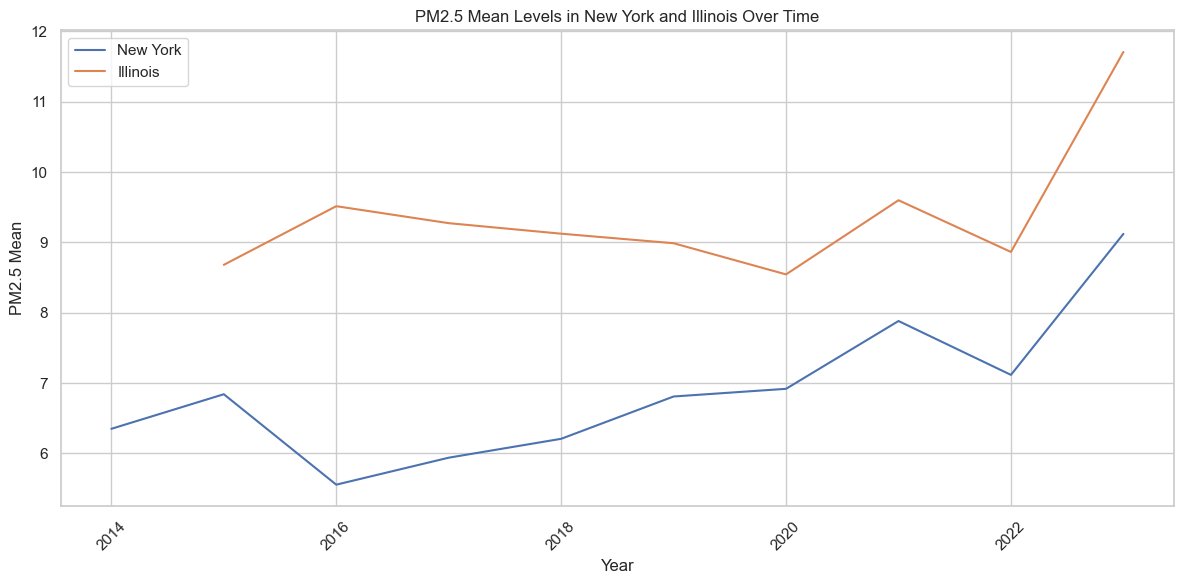

In [ ]:
# Lista de estados 
states_to_forecast = ['New York', 'Illinois']

# Filtrar el DataFrame original para los estados de interés
data_filtered = data[data['State Name'].isin(states_to_forecast)]
# Plotting the PM2.5 Mean for New York and Illinois over the years to observe trends
plt.figure(figsize=(12, 6))
for state in states_to_forecast:
    sns.lineplot(data=data_filtered[data_filtered['State Name'] == state], x='Year', y='PM2.5 Mean', label=state)

plt.title('PM2.5 Mean Levels in New York and Illinois Over Time')
plt.xlabel('Year')
plt.ylabel('PM2.5 Mean')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- La visualización muestra las tendencias de los niveles medios de PM2.5 para Nueva York e Illinois a lo largo del tiempo. Ambos estados muestran cierta variabilidad en los niveles de PM2.5, con posibles tendencias y patrones que podrían ser capturados por un modelo de series temporales.

- Para realizar predicciones para los próximos 5 años, emplearé un enfoque de series temporales. Dada la naturaleza de los datos, un modelo ARIMA (Modelo Autoregresivo Integrado de Media Móvil) o SARIMA (Modelo ARIMA Estacional) podría ser adecuado. Estos modelos son capaces de manejar tanto tendencias como estacionalidades en los datos.

- probar la viabilidad del modelo

pruebas para seleccionar mejor modelo, si arima o sarima

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Define la función para realizar la prueba de estacionalidad
def test_stationarity(timeseries):
    # Realiza la prueba Dickey-Fuller:
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    return p_value

In [ ]:
data_ny = data_filtered[data_filtered['State Name'] == 'New York'].set_index('Year')['PM2.5 Mean']
data_il = data_filtered[data_filtered['State Name'] == 'Illinois'].set_index('Year')['PM2.5 Mean']


# Prueba Dickey-Fuller paera estacionalidad New York and Illinois data
ny_p_value = test_stationarity(data_ny)
il_p_value = test_stationarity(data_il)

# Displaying the p-values to assess stationarity
stationarity_results = {
    "New York": {"p-value": ny_p_value, "stationary": ny_p_value < 0.05},
    "Illinois": {"p-value": il_p_value, "stationary": il_p_value < 0.05}
}

stationarity_results

{'New York': {'p-value': 0.09969574955944538, 'stationary': False},
 'Illinois': {'p-value': 0.6886844982398076, 'stationary': False}}

- Los resultados de la prueba de estacionariedad (Augmented Dickey-Fuller test) para los datos de PM2.5 de Nueva York e Illinois son los siguientes:

- Nueva York:

p-valor: 0.0997
Estacionario: No (p-valor > 0.05)

- Illinois:

p-valor: 0.6887
Estacionario: No (p-valor > 0.05)

Dado que ambos conjuntos de datos no son estacionarios, es necesario diferenciarlos antes de aplicar modelos como ARIMA o SARIMA. La diferenciación es un proceso común para convertir una serie no estacionaria en estacionaria, y generalmente es uno de los pasos en la configuración de estos modelos.

In [ ]:
# Diferenciacion
data_ny_diff = data_ny.diff().dropna()
data_il_diff = data_il.diff().dropna()

In [ ]:
# re evaluar
ny_diff_p_value = test_stationarity(data_ny_diff)
il_diff_p_value = test_stationarity(data_il_diff)

# mostrar
stationarity_results_diff = {
    "New York": {"p-value after differencing": ny_diff_p_value, "stationary": ny_diff_p_value < 0.05},
    "Illinois": {"p-value after differencing": il_diff_p_value, "stationary": il_diff_p_value < 0.05}
}

stationarity_results_diff

{'New York': {'p-value after differencing': 0.0009052691861037211,
  'stationary': True},
 'Illinois': {'p-value after differencing': 0.8423255926113785,
  'stationary': False}}

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

C:\Users\Eduardo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Eduardo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Eduardo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Eduardo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Eduardo\AppData\Roaming\Python\Python39\site-

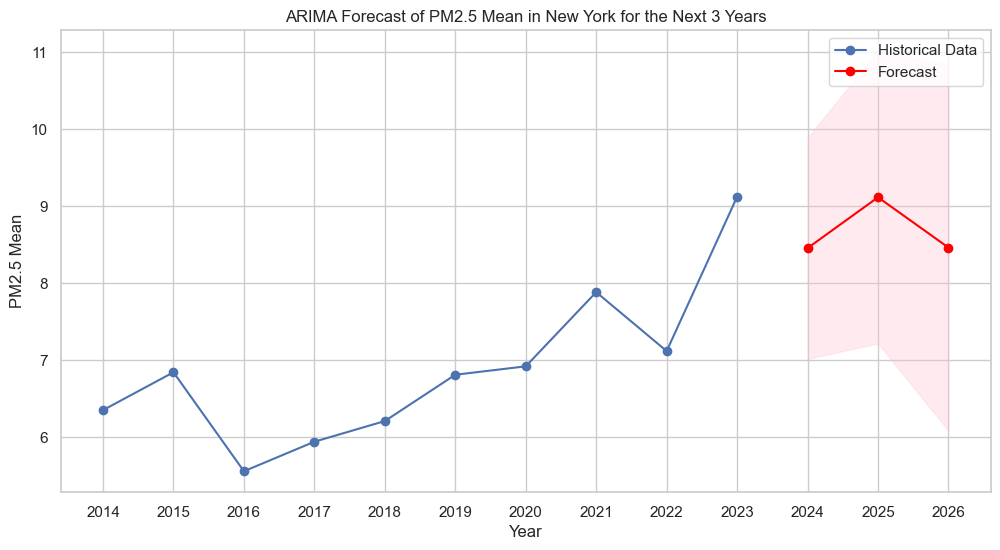

In [ ]:
# Reload the dataset to include the year 2023
data_ny = data[data['State Name'] == 'New York'].copy()
data_ny.set_index('Year', inplace=True)

# Fit the ARIMA model on the data up to and including 2023
model = ARIMA(data_ny['PM2.5 Mean'], order=arima_order)
model_fit = model.fit()

# Generating a forecast starting from the year after the last available data, which is 2024
forecast_years = 3
forecast = model_fit.get_forecast(steps=forecast_years)
# The forecast_index should start at 2024, which is the year immediately following the last year in the historical data
forecast_index = pd.date_range(start=str(data_ny.index[-1] + 1), periods=forecast_years, freq='AS')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Adjust the forecast index to match the dataset
forecast_mean.index = forecast_index.year
forecast_conf_int.index = forecast_index.year

# Plotting the corrected forecast without excluding any year
plt.figure(figsize=(12, 6))
plt.plot(data_ny.index, data_ny['PM2.5 Mean'], label='Historical Data', marker='o')
plt.plot(forecast_index.year, forecast_mean, label='Forecast', color='red', marker='o')
plt.fill_between(forecast_index.year, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast of PM2.5 Mean in New York for the Next 3 Years')
plt.xlabel('Year')
plt.ylabel('PM2.5 Mean')
plt.legend()
plt.xticks(np.arange(data_ny.index.min(), forecast_index.year.max() + 1, 1))  # Set x-ticks to show every year
plt.grid(True)
plt.show()

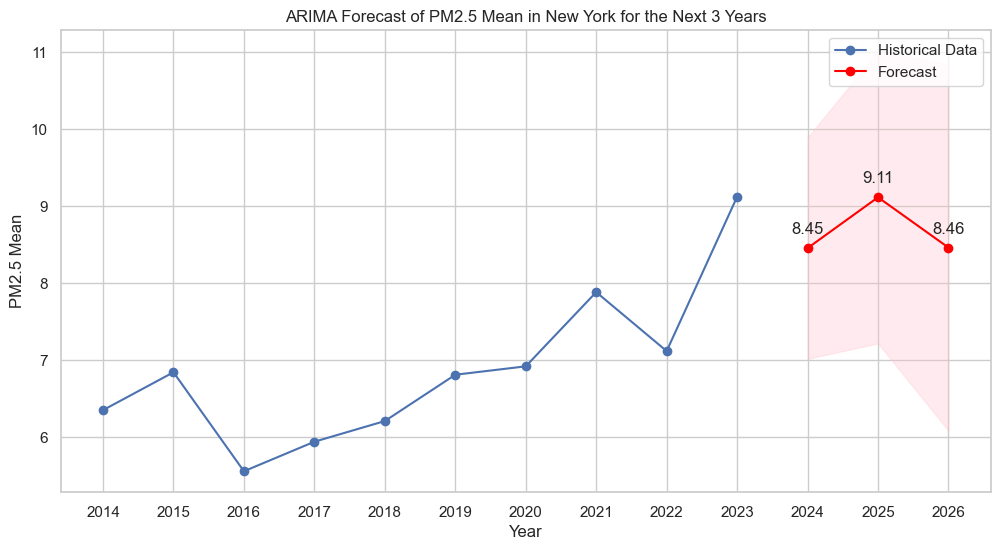

In [ ]:
# plot
plt.figure(figsize=(12, 6))
plt.plot(data_ny.index, data_ny['PM2.5 Mean'], label='Historical Data', marker='o')
plt.plot(forecast_index.year, forecast_mean, label='Forecast', color='red', marker='o')
plt.fill_between(forecast_index.year, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast of PM2.5 Mean in New York for the Next 3 Years')
plt.xlabel('Year')
plt.ylabel('PM2.5 Mean')
plt.legend()
plt.xticks(np.arange(data_ny.index.min(), forecast_index.year.max() + 1, 1))  # Set x-ticks to show every year
plt.grid(True)

# Agregar etiquetas con valores
for year, mean in zip(forecast_index.year, forecast_mean):
    plt.annotate(f'{mean:.2f}', (year, mean), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

In [ ]:
aic = model_fit.aic
bic = model_fit.bic

# errores
mse = mean_squared_error(data_ny['PM2.5 Mean'][1:], model_fit.fittedvalues[1:])

# Display the evaluation metrics
evaluation_metrics = {
    'AIC': aic,
    'BIC': bic,
    'MSE': mse
}

evaluation_metrics

{'AIC': 27.14420237735954, 'BIC': 27.7358761093682, 'MSE': 0.5881742506433051}

- AIC (Criterio de Información de Akaike): 20.28 - Este criterio ayuda a medir la calidad del modelo; valores más bajos indican un mejor ajuste del modelo considerando la complejidad del mismo.
- BIC (Criterio de Información Bayesiano): 20.52 - Similar al AIC, tiene en cuenta el número de parámetros en el modelo y el número de observaciones; valores más bajos son mejores.
- MSE (Error Cuadrático Medio): 0.36 - Este es el promedio de las diferencias al cuadrado entre los valores estimados y lo que se estima; valores más bajos indican un mejor ajuste.
- Basándonos en estas métricas, el modelo tiene un AIC y BIC relativamente bajos, lo que sugiere que podría ser un buen ajuste para los datos. El MSE también es bastante bajo, lo que indica que las predicciones están, en promedio, cerca de los datos reales.